# SVC on Wine Dataset with 
The Dataset source : Kaggle (: https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv).
* SHWETA KANHERE BANAIT
    * GitHub :https://github.com/shwetawin/PythonProject
    *Linkdin: https://www.linkedin.com/in/shweta-kanhere-07810213/
    *Email:shweta.kanhere@gmail.com
####  Content :
* 1. EDA and FE for both dataset
* 2. SVC Model
* 3. Performance metrics for above model
* 4. Performance improvement using GridSearchCV



##  Import required libraries

In [1]:
### Pandas and Numpy
import pandas as pd
import numpy as np
### Visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
### For Q-Q Plot
import scipy.stats as stats
### To ignore warnings
import warnings
warnings.filterwarnings('ignore')
### Machine Learning libraries
import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, r2_score
### To be able to see maximum columns on screen
pd.set_option('display.max_columns', 500)
### To save the model
import pickle

#  Support Vector Classifier for Wine Dataset


In [15]:
# upload dataset
pd.read_csv("https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv")

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


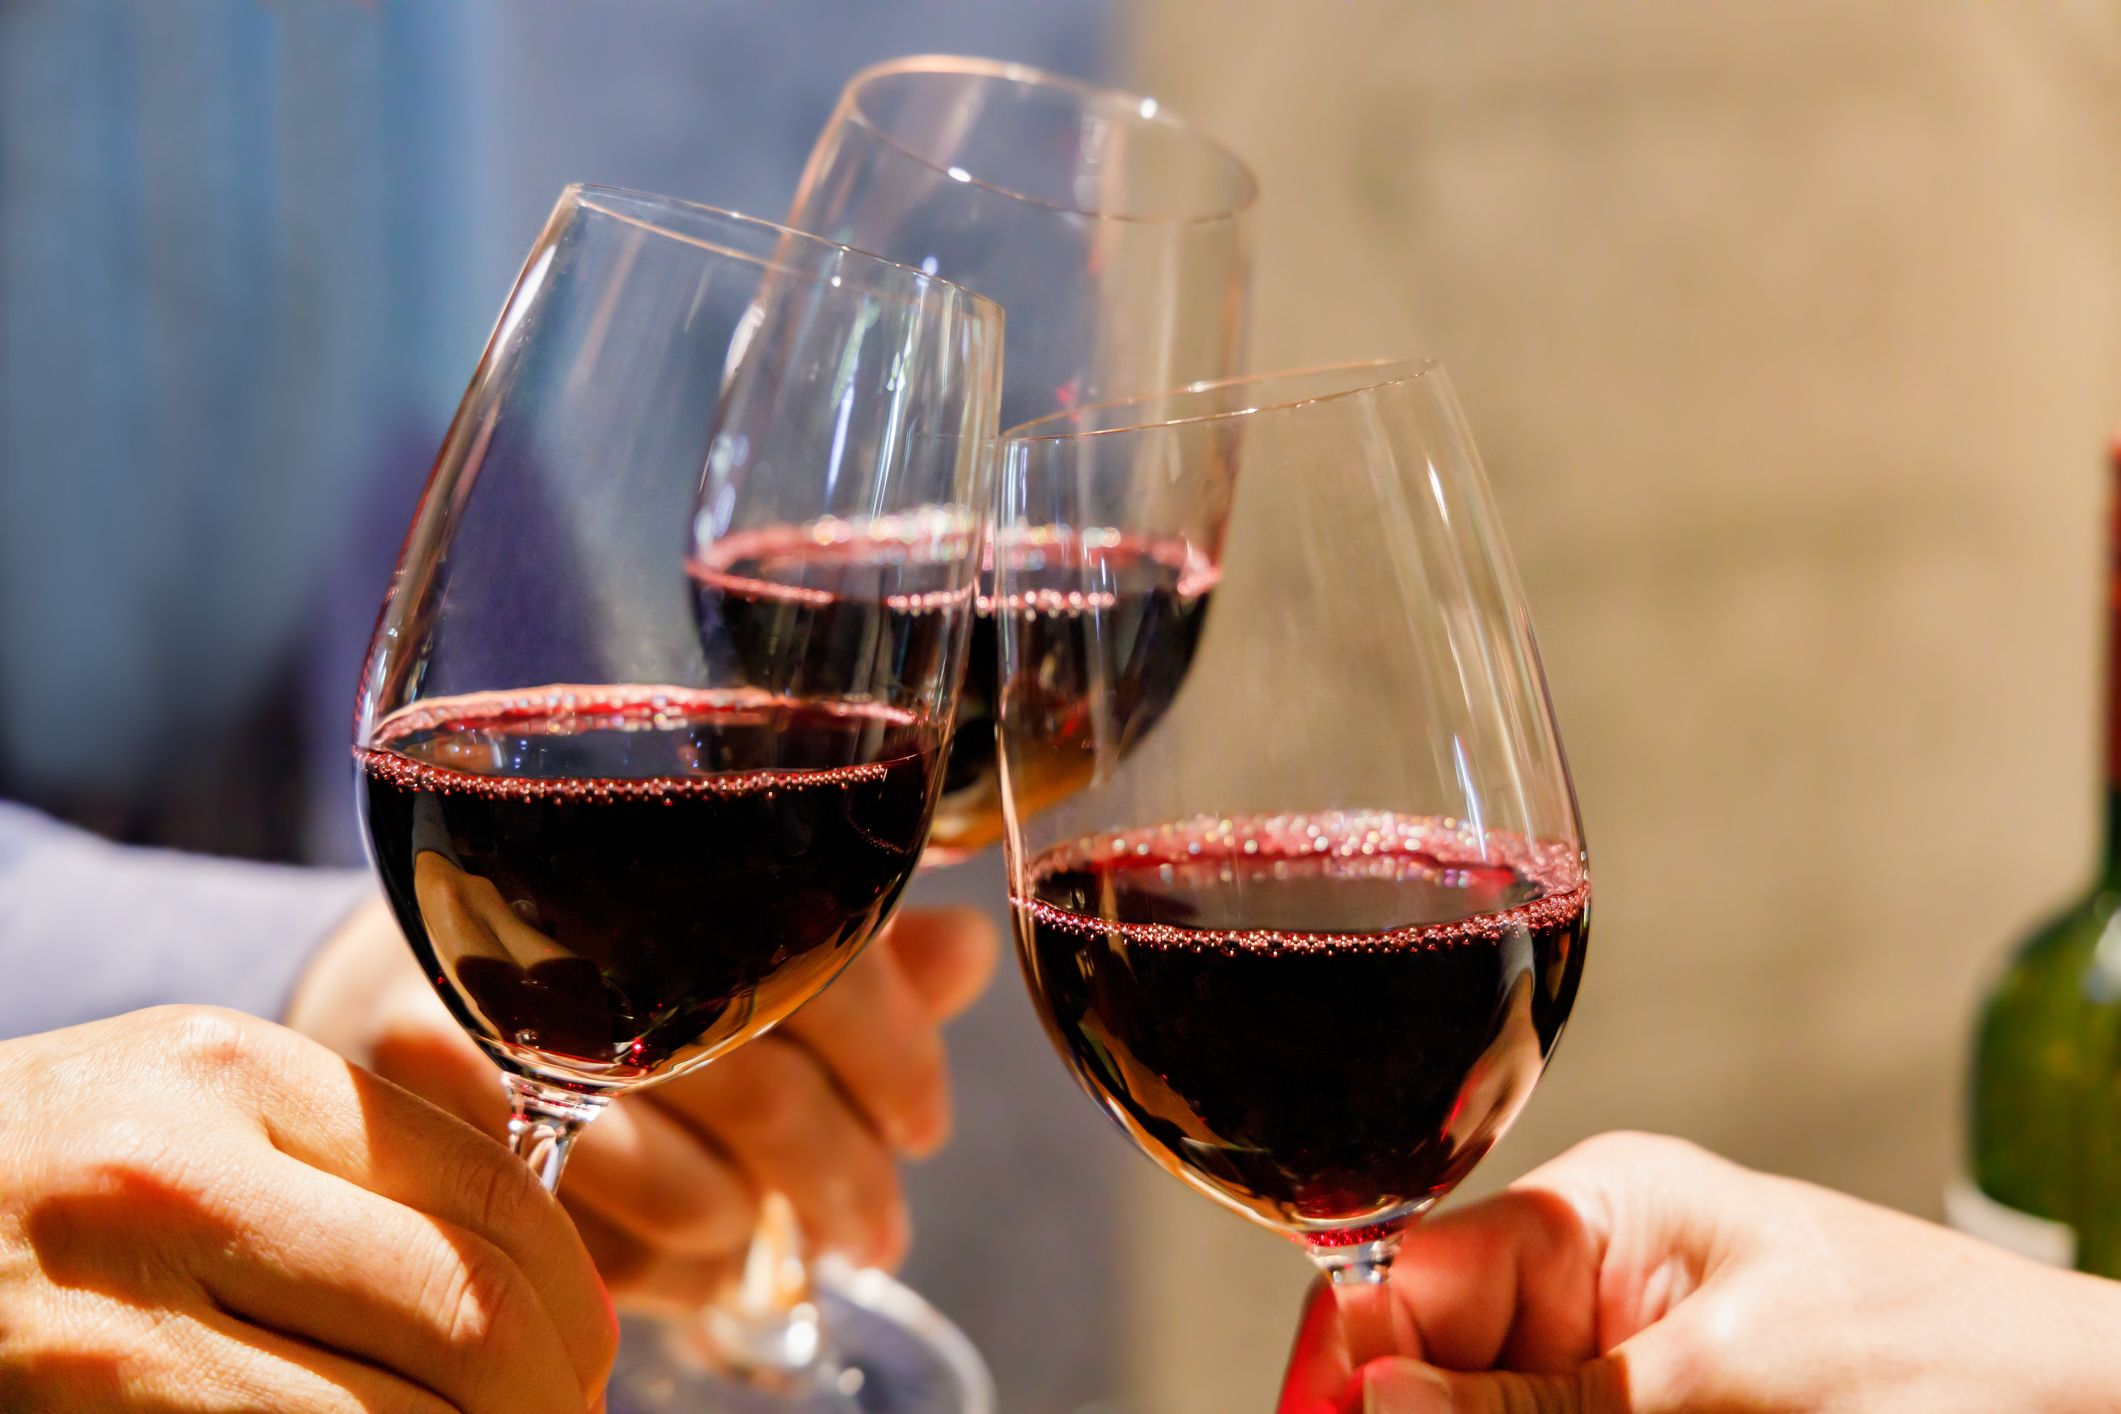

In [16]:
from IPython import display
display.Image("wine.jpg")


In [17]:
data=pd.read_csv("https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv")

In [18]:
data.columns


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


#  Observation
No null values in the data set from info


In [20]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [21]:
data.describe().T


,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [22]:
data.quality

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

* getting unique values for quality feature


In [23]:
data.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

* getting count of record for each unique value in quality

In [24]:
data["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [25]:
### getting null values in each feature
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Visualising Numerical data


In [26]:
numerical_features = [fea for fea in data.columns if data[fea].dtypes !="O"]
numerical_features

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [30]:
### getting  numerical features
numerical_features=[feature for feature in data.columns if data[feature].dtypes!='O']
print(numerical_features)


['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


In [31]:
### getting count of unique value in each feature
for feature in numerical_features:
 print("'{}', = '{}' No. of unique values".format(feature, data[feature].nunique()))


'fixed acidity', = '96' No. of unique values
'volatile acidity', = '143' No. of unique values
'citric acid', = '80' No. of unique values
'residual sugar', = '91' No. of unique values
'chlorides', = '153' No. of unique values
'free sulfur dioxide', = '60' No. of unique values
'total sulfur dioxide', = '144' No. of unique values
'density', = '436' No. of unique values
'pH', = '89' No. of unique values
'sulphates', = '96' No. of unique values
'alcohol', = '65' No. of unique values
'quality', = '6' No. of unique values


In [32]:
continuous_features=[fea for fea in numerical_features if data[fea].nunique()>6]
print(continuous_features)


['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


<AxesSubplot:xlabel='quality', ylabel='count'>

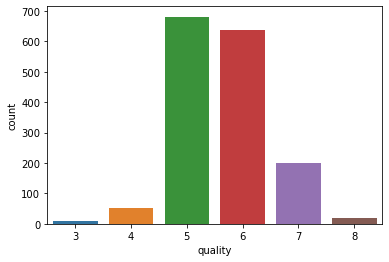

In [33]:
#visualising count of quality feature
sns.countplot(data=data,x='quality' )


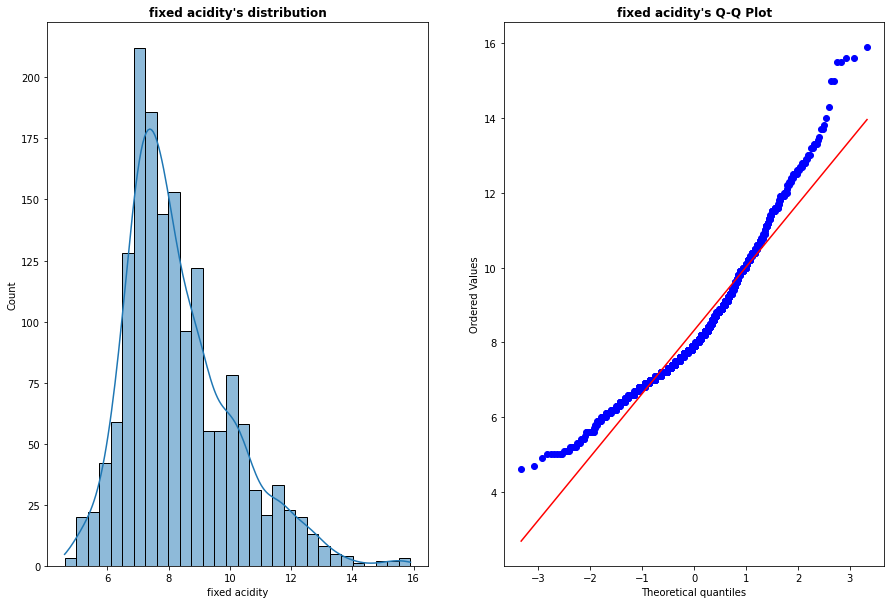

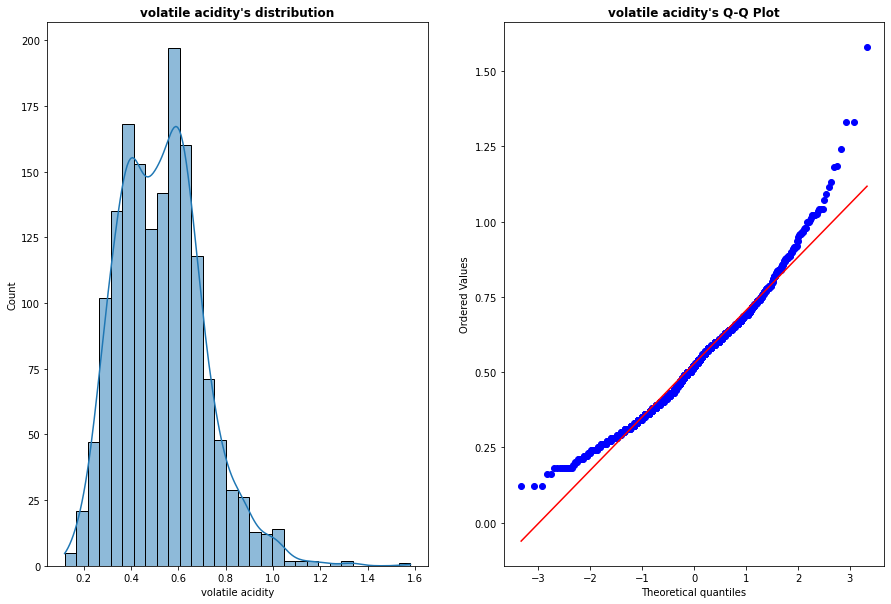

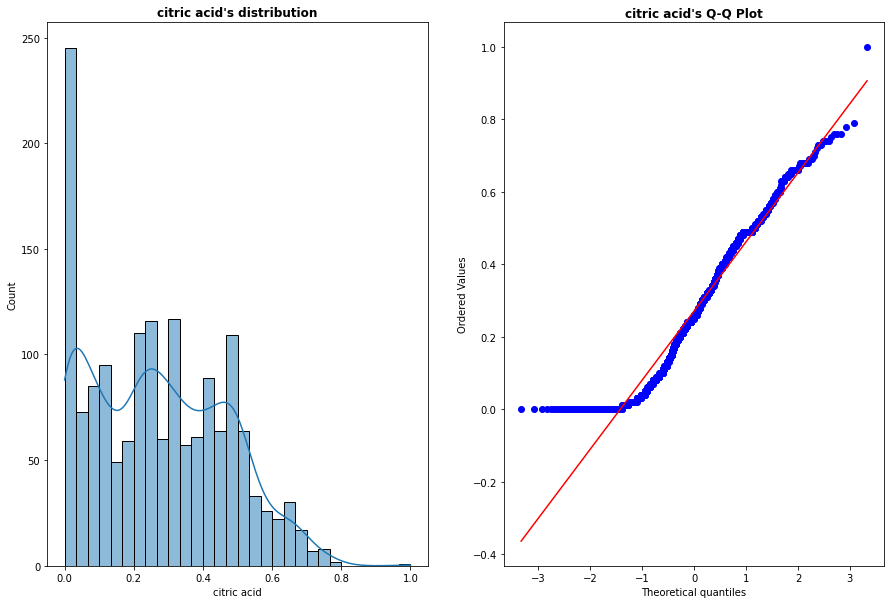

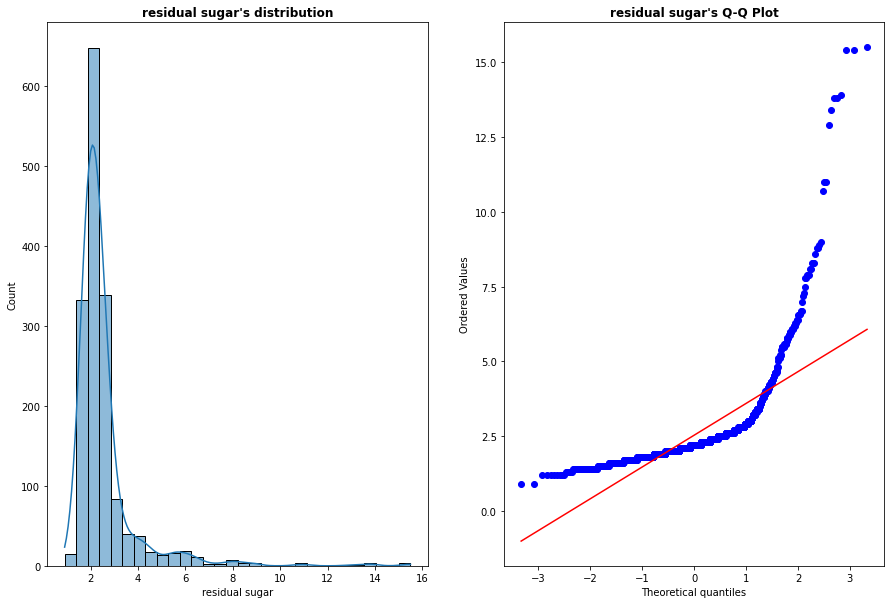

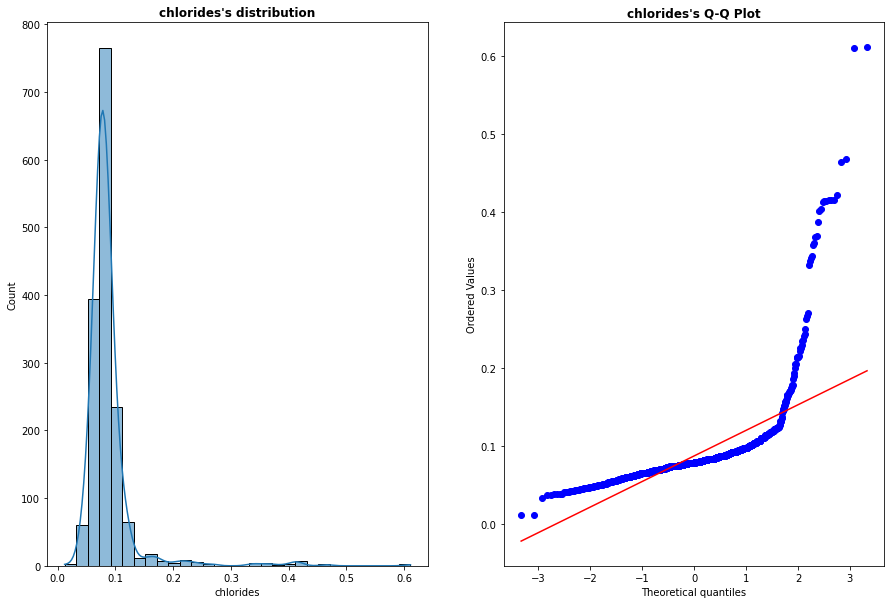

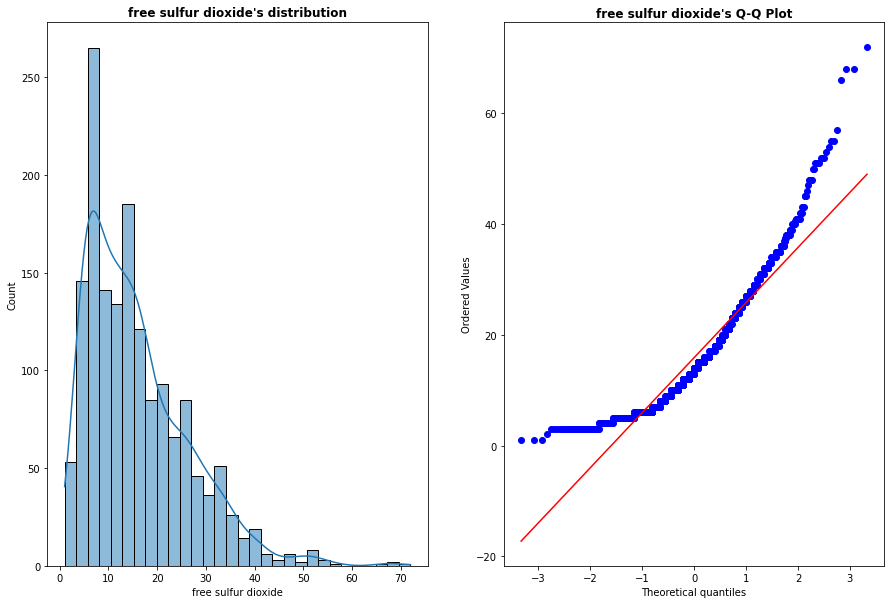

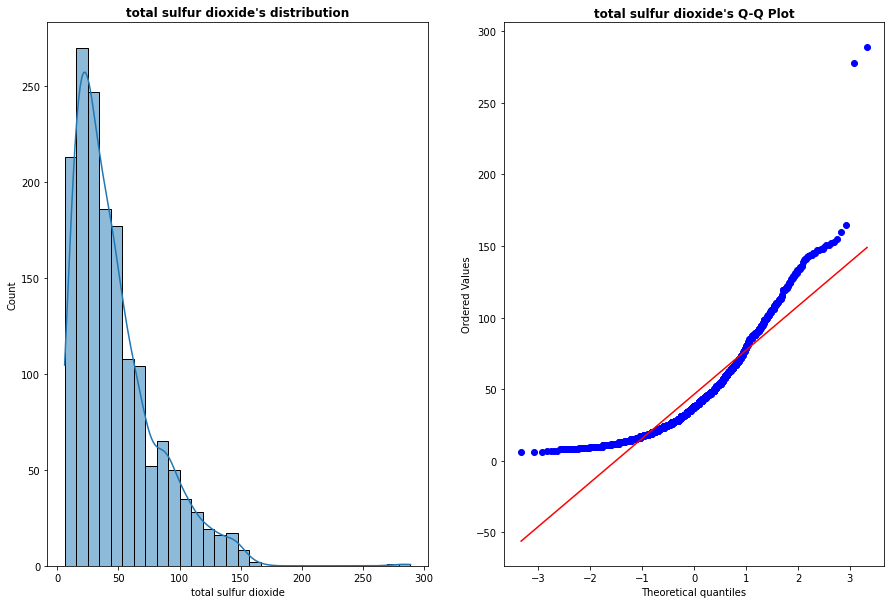

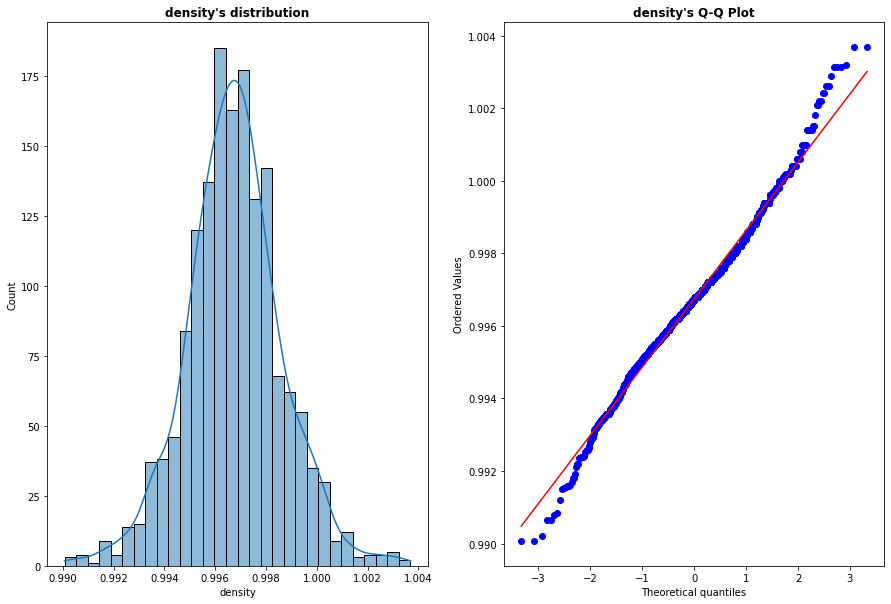

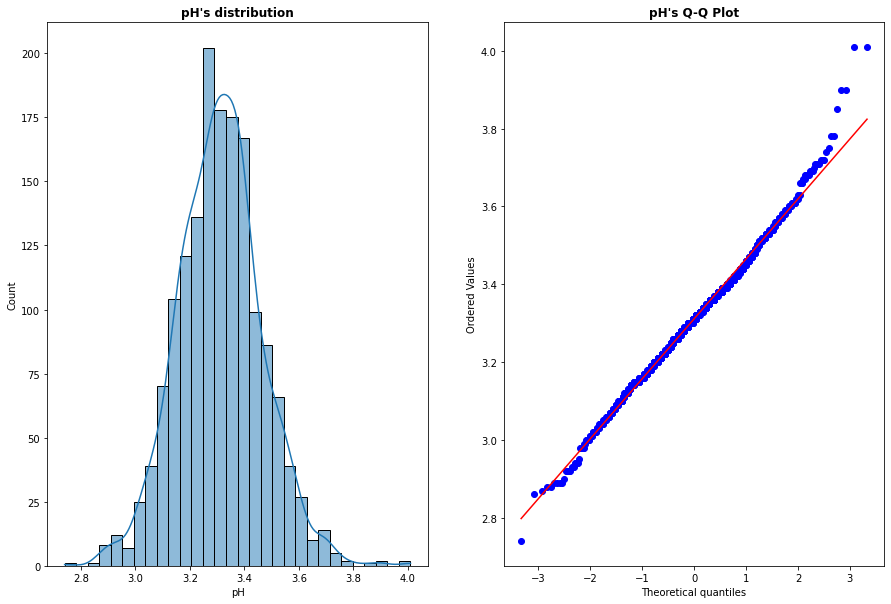

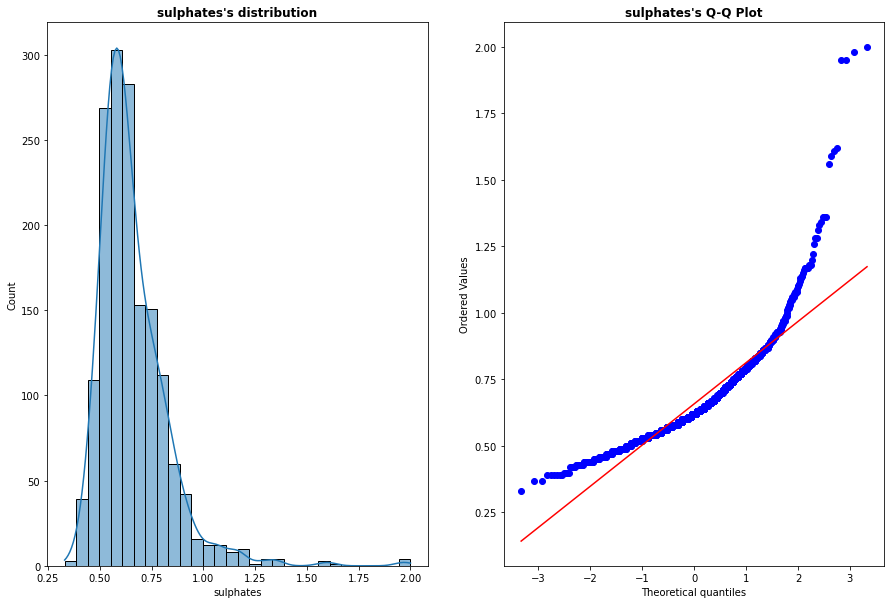

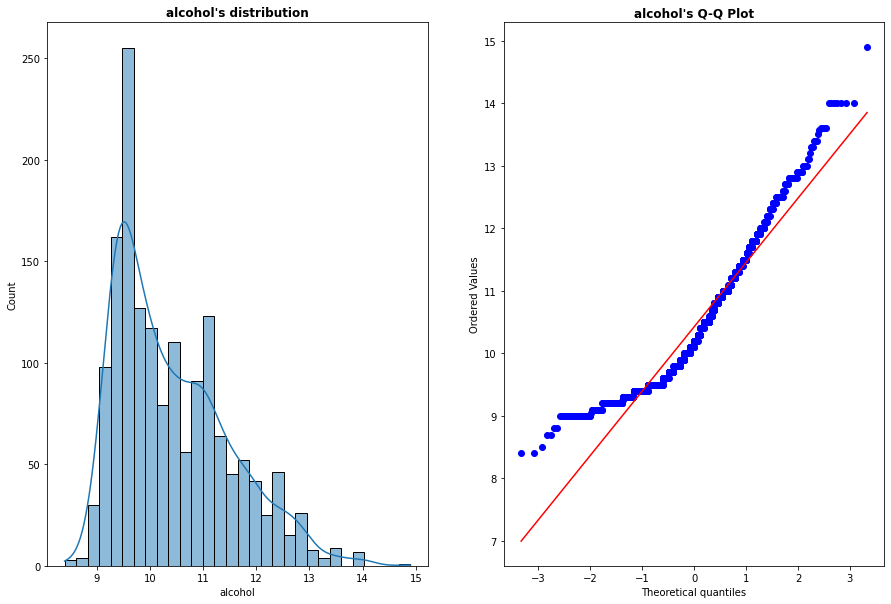

In [35]:
# Checking distribution of Continuous numerical features
for i in continuous_features:
 plt.figure(figsize=(15,10))
 plt.subplot(121)
 sns.histplot(data=data, x=i, kde=True, bins=30)
 plt.title("{}'s distribution".format(i),fontweight="bold")

 plt.subplot(122)
 stats.probplot(data[i], dist='norm', plot=plt)
 plt.title("{}'s Q-Q Plot".format(i),fontweight="bold")
 plt.show();

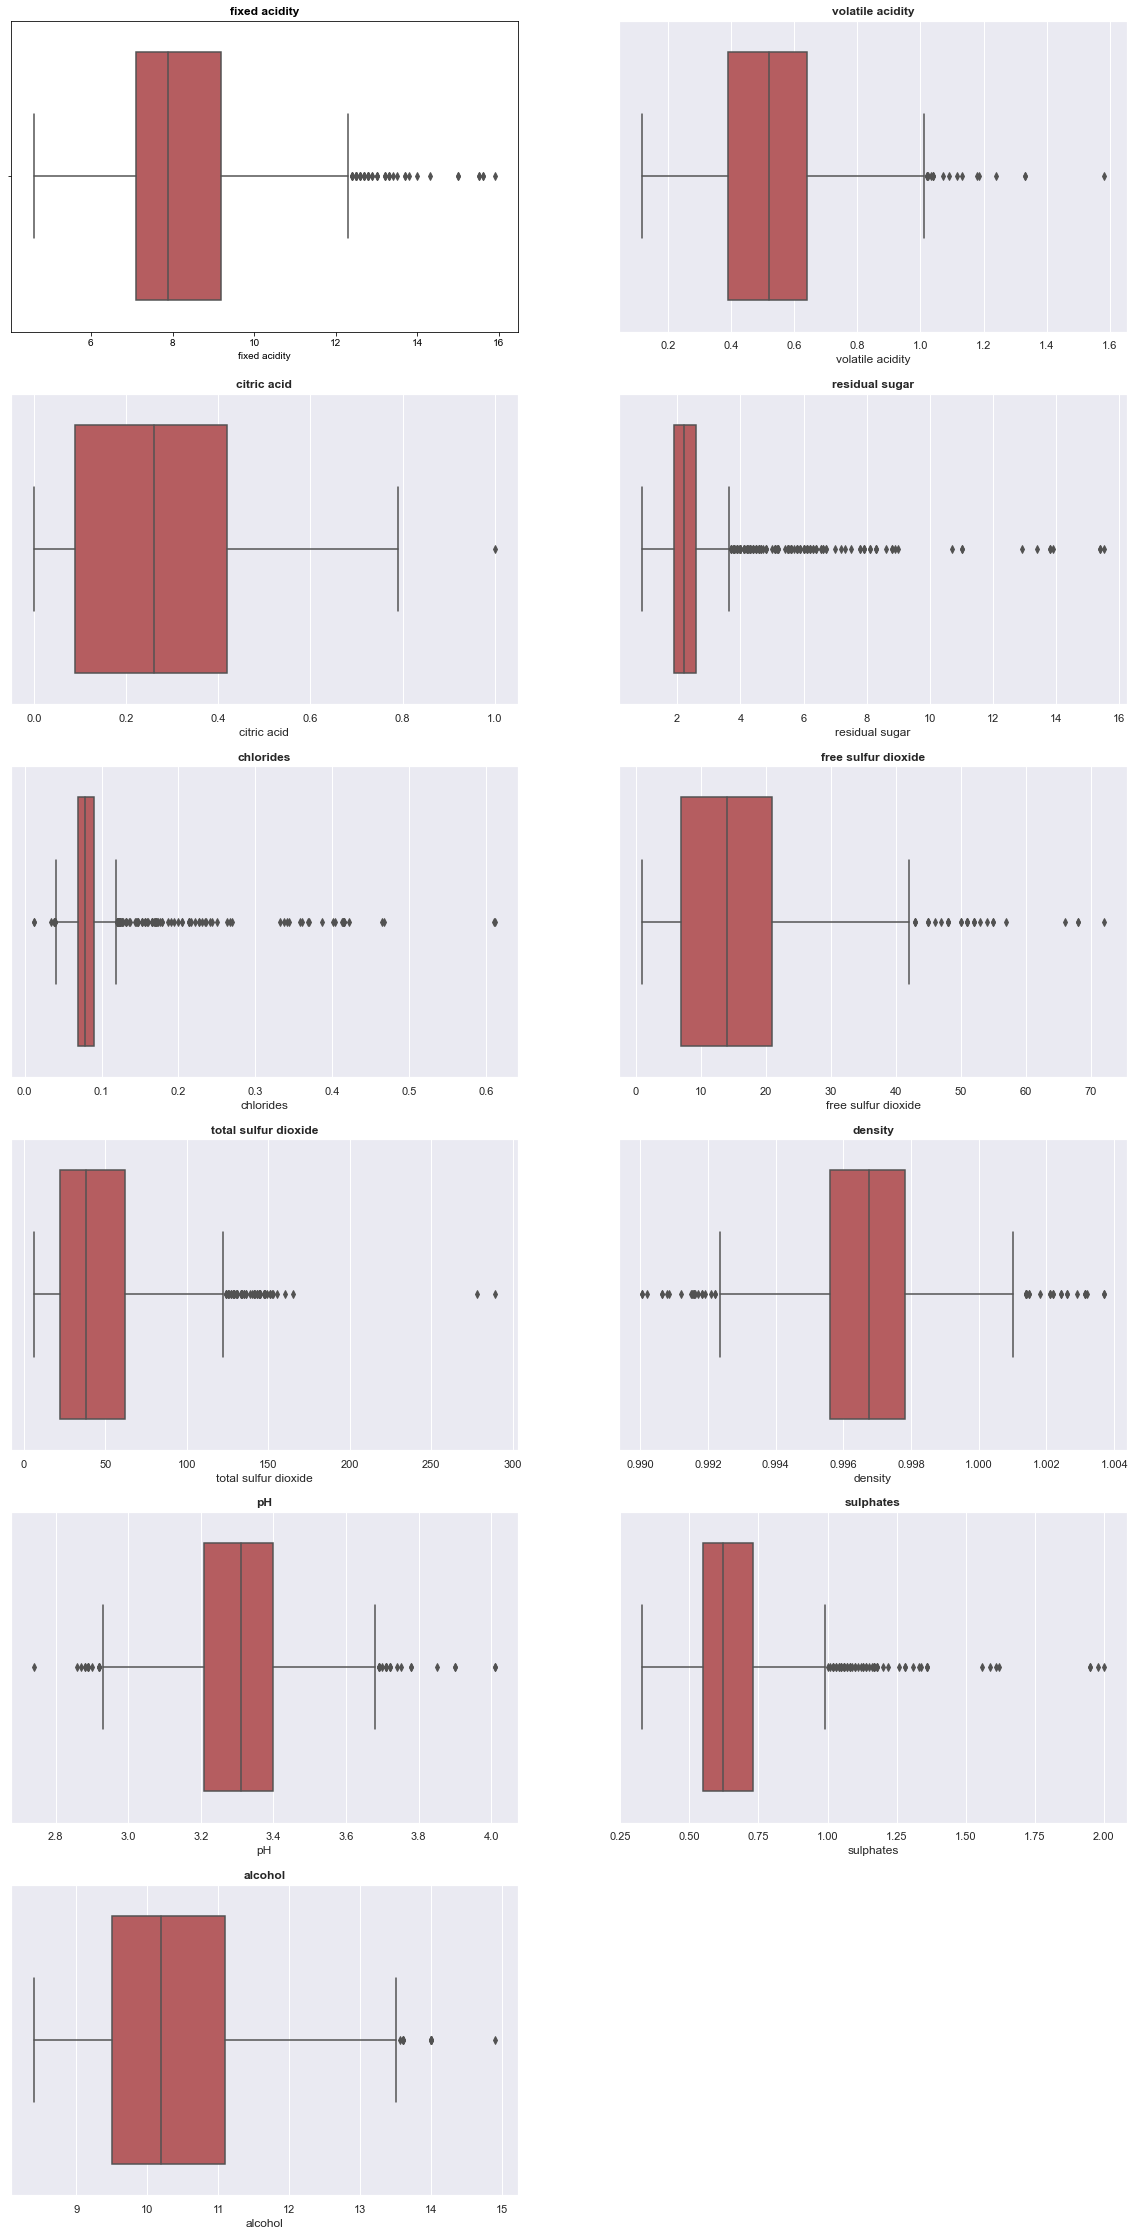

In [36]:
# Checking outliers in numerical features
plt.figure(figsize=(20,40))
for i in enumerate(continuous_features):
 plt.subplot(6, 2, i[0]+1)
 sns.set(rc={'figure.figsize':(10,10)})
 sns.boxplot(data=data, x=i[1], color='r')
 plt.title("{}".format(i[1]), fontweight="bold")

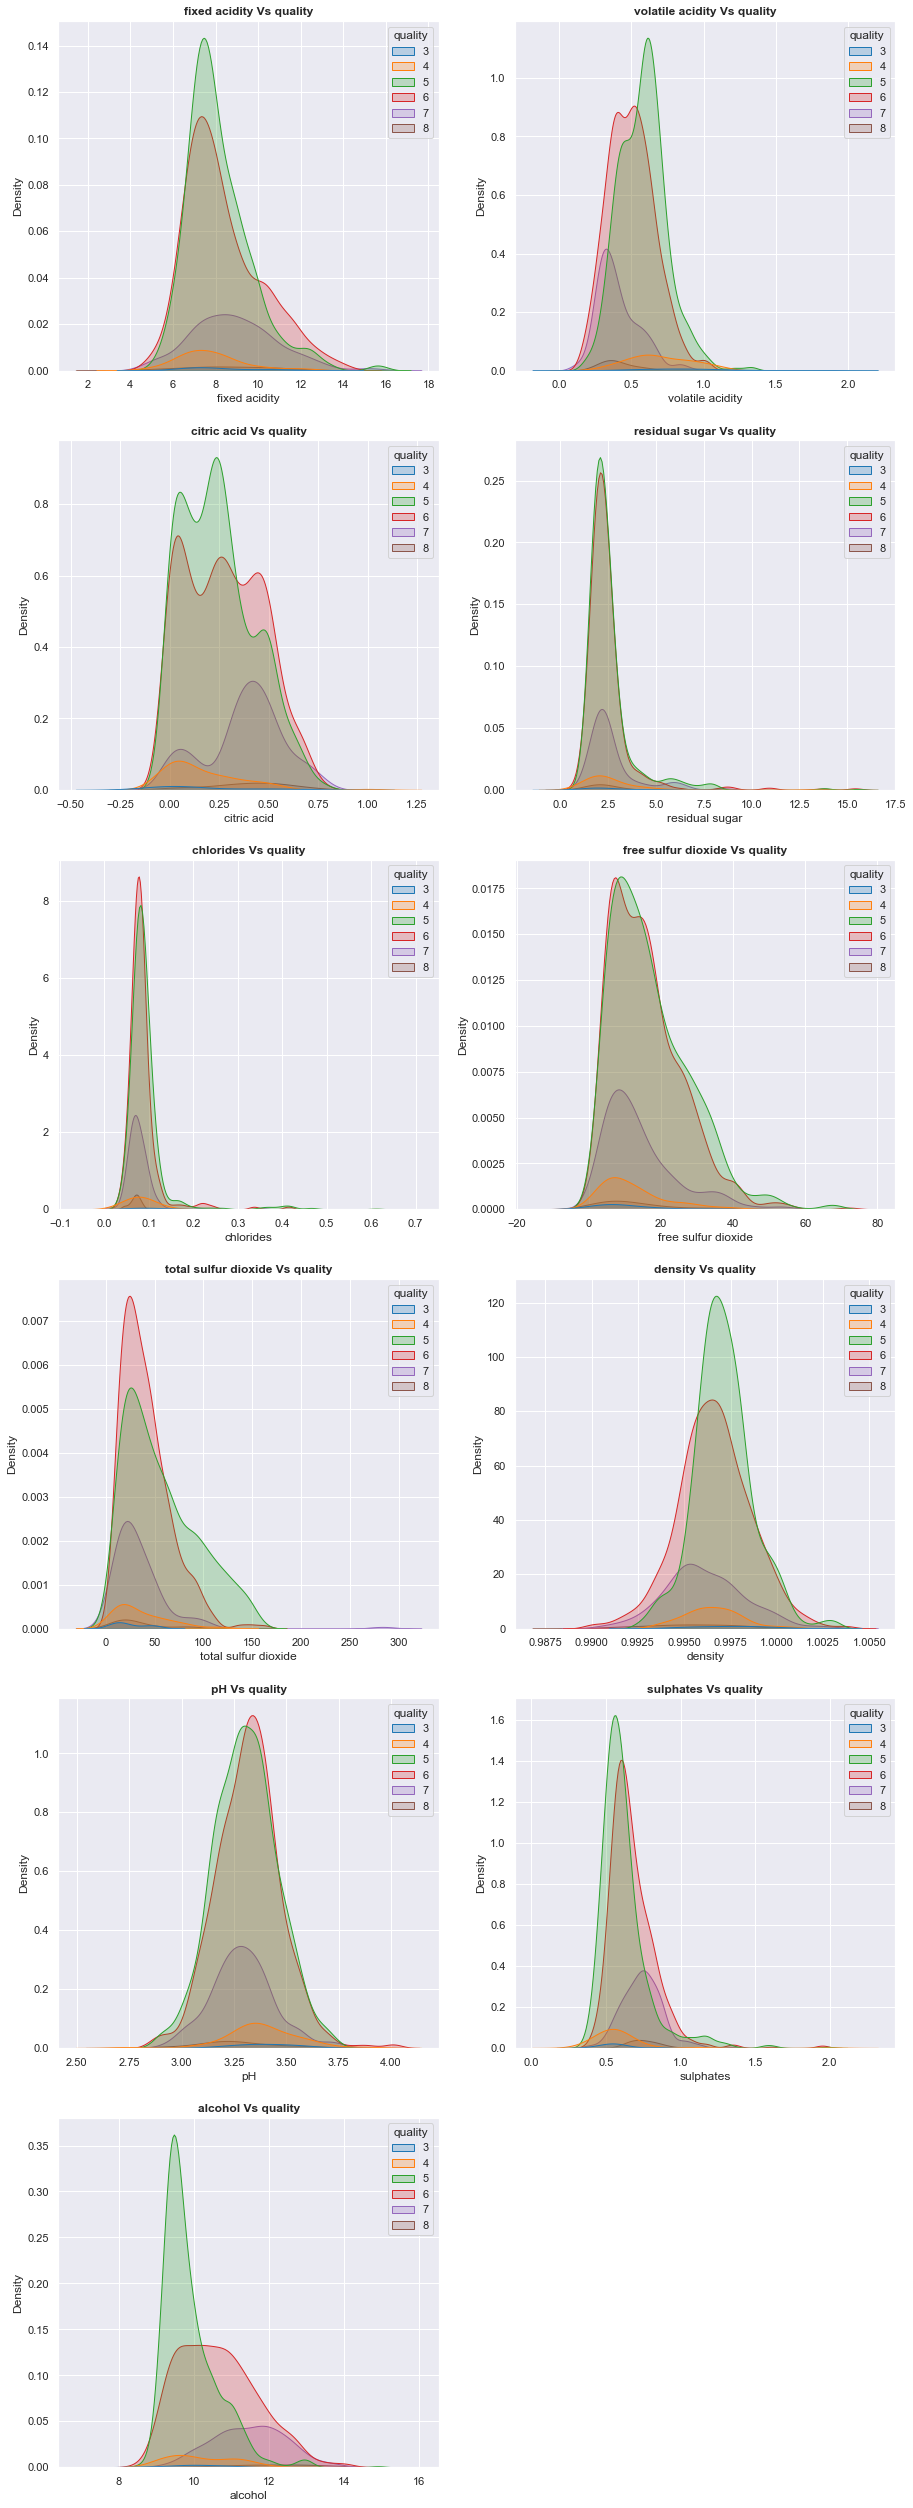

In [37]:
### Comparing Continuous numerical features with quality feature
palette1=sns.color_palette("tab10", 6)
plt.figure(figsize=(15,45))
for i in enumerate(continuous_features):
    plt.subplot(6, 2, i[0]+1)
    sns.set(rc={'figure.figsize':(7,7)})
    sns.kdeplot(data=data, x=i[1], hue='quality', palette=palette1, fill=True)
    plt.title("{} Vs quality".format(i[1]),fontweight="bold")

In [ ]:
# getting outliers in features for each unique value in quality feature
plt.figure(figsize=(20,40))
for i in enumerate(continuous_features):
 plt.subplot(6, 2, i[0]+1)
 sns.set(rc={'figure.figsize':(10,6)})
 sns.boxplot(data=data, y=i[1], x='quality')
 plt.title("{} vs quality".format(i[1]),fontsize=15, fontweight="bold")

In [40]:
#getting correlation for all the features
corr=data.corr()
corr


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<AxesSubplot:>

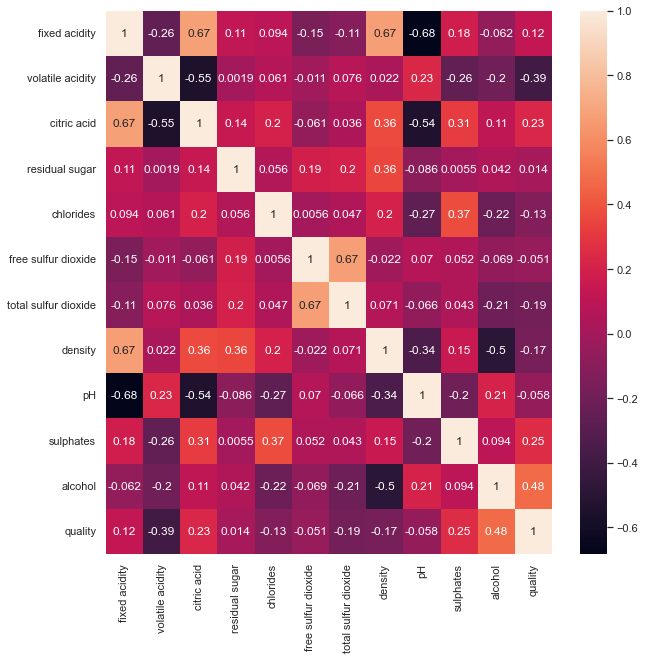

In [45]:
# Plotting heatmap for visualising the correlation between features
sns.set(rc={'figure.figsize':(10,10)})
sns.heatmap(data=corr, annot=True)

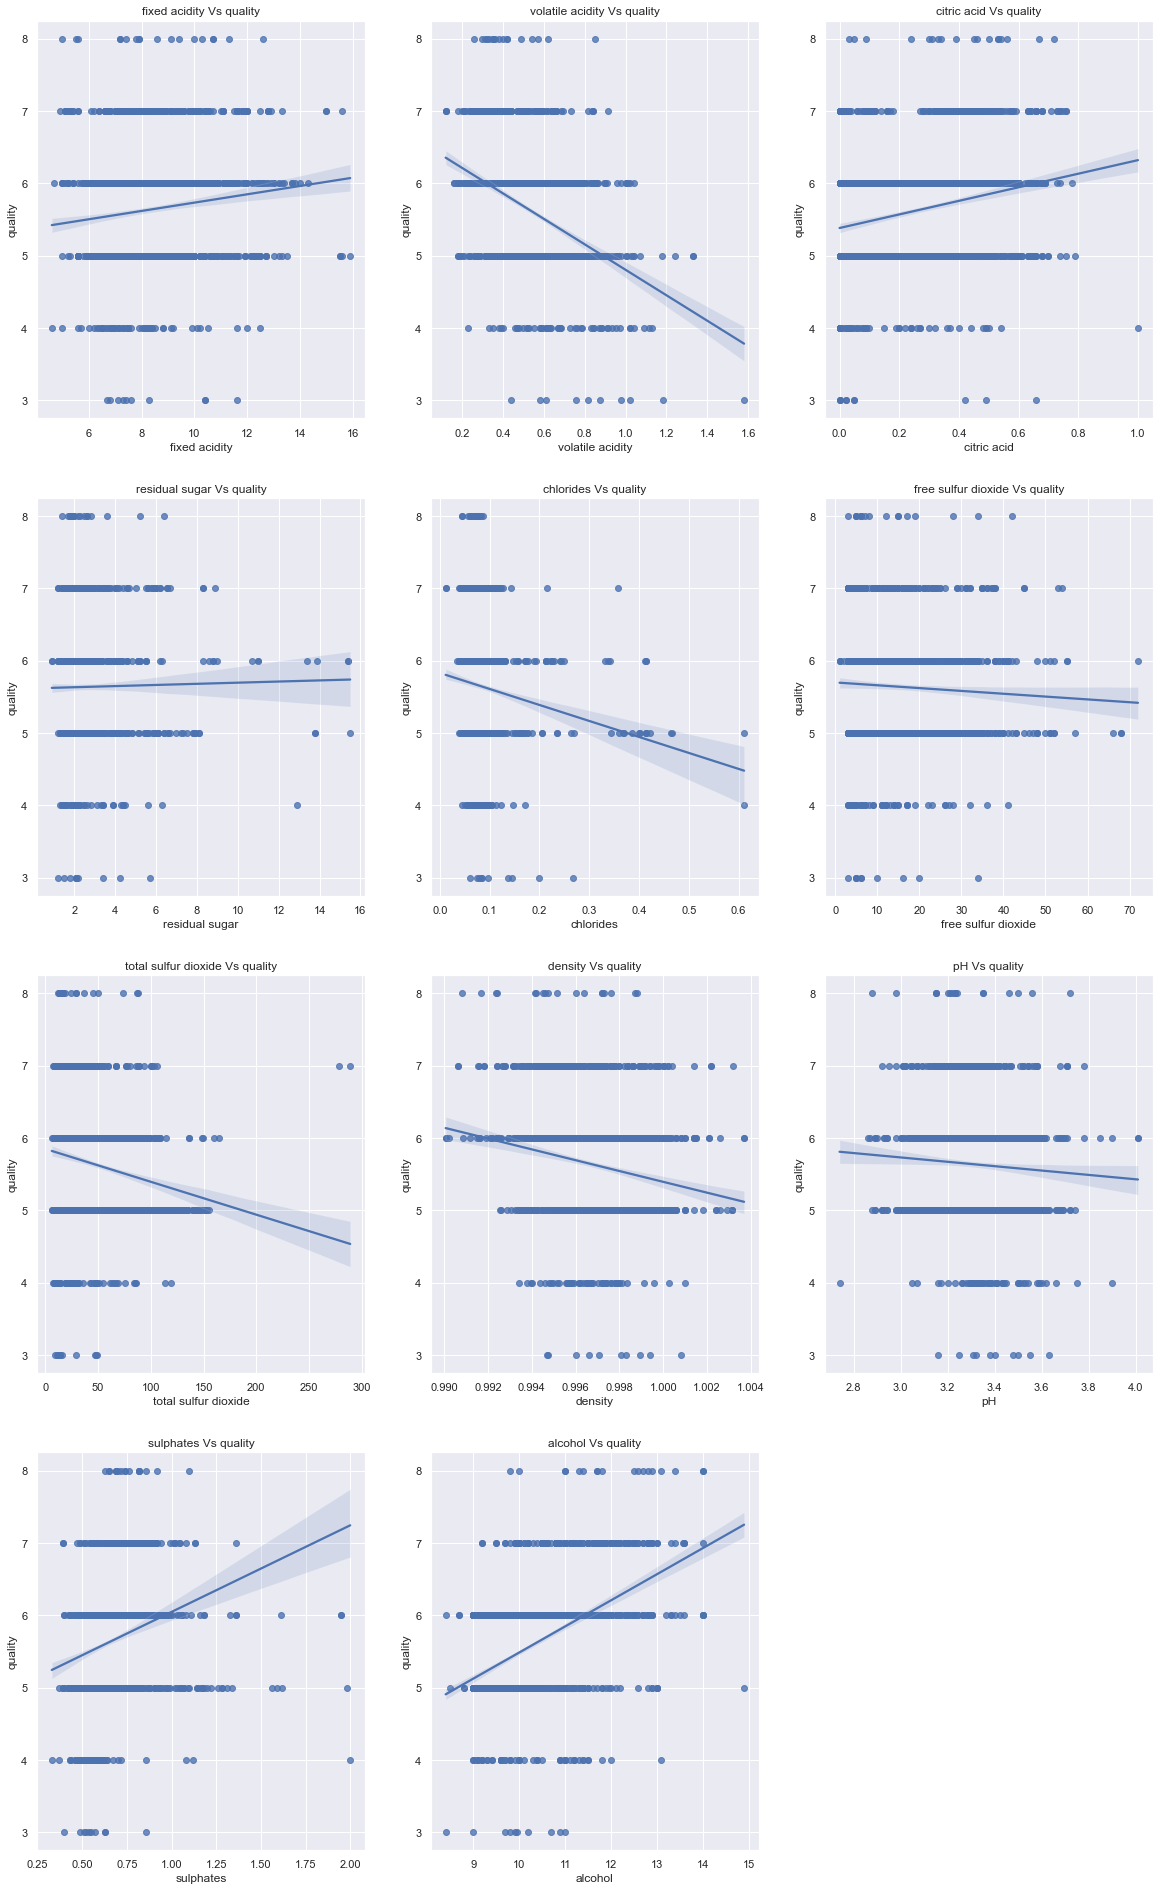

In [51]:
### plotting regplot for all the features wrt. quality
plt.figure(figsize=(20,60))
for i in enumerate(continuous_features):
 plt.subplot(7, 3, i[0]+1)
 sns.set(rc={'figure.figsize':(8,10)})
 sns.regplot(data=data, x=i[1], y='quality')
 plt.xlabel(i[1])
 plt.ylabel("quality")
 plt.title("{} Vs quality".format(i[1]))

### Splitting data into independent and dependent features


In [52]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [53]:
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [55]:
# if we select random_state=10 then all have same data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)


In [63]:
# check the shapes as both test and train set need to have same shape
print("X_train shape is : ",X_train.shape )
print("y_train shape is : ",y_train.shape )
print("X_test shape is : ",X_test.shape )
print("y_test shape is : ",y_test.shape )

X_train shape is :  (1199, 11)
y_train shape is :  (1199,)
X_test shape is :  (400, 11)
y_test shape is :  (400,)


###  Feature Scaling or Standardization

In [66]:
scaler=StandardScaler()
print ("scaler",scaler)
print("-----------******----------------")
#### apply scaler on X train data
scaler.fit_transform(X_train)


scaler StandardScaler()
-----------******----------------


array([[ 0.36628211,  0.9252263 , -1.41559084, ...,  0.2800327 ,
        -0.34099149, -1.03579592],
       [ 0.99530488, -1.38052243,  0.95277345, ..., -1.75526948,
         0.71993818, -0.17938734],
       [ 0.65220155,  1.88126845, -0.07695015, ..., -0.37651639,
        -0.22931468, -0.36970036],
       ...,
       [-0.77739563, -0.8181447 ,  1.10723199, ...,  0.54265233,
         0.60826138,  0.96249075],
       [ 0.93812099, -0.98685802,  1.00425963, ..., -0.50782621,
        -0.78769872,  1.5334298 ],
       [-0.77739563,  0.41908633,  0.12899457, ..., -0.04824185,
         2.84179753, -0.17938734]])

In [67]:
## after transfor store the data into variable called X_train or any new variable
X_train=scaler.fit_transform(X_train)
X_train

array([[ 0.36628211,  0.9252263 , -1.41559084, ...,  0.2800327 ,
        -0.34099149, -1.03579592],
       [ 0.99530488, -1.38052243,  0.95277345, ..., -1.75526948,
         0.71993818, -0.17938734],
       [ 0.65220155,  1.88126845, -0.07695015, ..., -0.37651639,
        -0.22931468, -0.36970036],
       ...,
       [-0.77739563, -0.8181447 ,  1.10723199, ...,  0.54265233,
         0.60826138,  0.96249075],
       [ 0.93812099, -0.98685802,  1.00425963, ..., -0.50782621,
        -0.78769872,  1.5334298 ],
       [-0.77739563,  0.41908633,  0.12899457, ..., -0.04824185,
         2.84179753, -0.17938734]])

In [69]:
## to avoide leakage use transform only
X_test=scaler.transform(X_test)
X_test

array([[ -5.09401291,  -4.70982525,   3.48987574, ..., -21.16897975,
         -4.65995954,  -9.78440705],
       [ -5.09401291,   3.82943022,  -6.84834865, ..., -29.79011384,
         -9.33685053, -10.2371451 ],
       [ -2.837715  ,  -9.77012479,  10.91219068, ..., -40.99758817,
          0.32872419, -11.68590685],
       ...,
       [ -5.06131294,  -5.97490014,  -0.75144709, ..., -15.99629929,
         -1.85382494,  -8.87893095],
       [ -4.93051306,  -3.76101909,   0.04380094, ..., -26.3416602 ,
         -7.1543014 , -10.68988315],
       [ -4.995913  , -11.3514684 ,  -1.8117778 , ..., -28.49694373,
          0.32872419,  -9.42221661]])

### Building SVC Model

In [100]:
from sklearn.svm import SVC

svc=SVC()
svc

SVC()

In [71]:
svc.fit(X_train,y_train)  # y_train - dependent feature and  X_train- independent feature 

SVC()

In [72]:
svc_pred=svc.predict(X_test)
svc_pred


array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,

In [77]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, classification_report
confusion_mat=confusion_matrix(y_test, svc_pred)
confusion_mat

array([[  0,   0,   2,   0,   0,   0],
       [  0,   0,  15,   0,   0,   0],
       [  0,   0, 172,   0,   0,   0],
       [  0,   0, 152,   0,   0,   0],
       [  0,   0,  50,   0,   0,   0],
       [  0,   0,   9,   0,   0,   0]], dtype=int64)

In [92]:
# check the accuracy of model
acc=accuracy_score(y_test, svc_pred)
print ("accuracy of model=",acc*100)


accuracy of model= 43.0


In [86]:
report=classification_report(y_test, svc_pred, zero_division=False)
print("Model Output : ")
print(report)


Model Output : 
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        15
           5       0.43      1.00      0.60       172
           6       0.00      0.00      0.00       152
           7       0.00      0.00      0.00        50
           8       0.00      0.00      0.00         9

    accuracy                           0.43       400
   macro avg       0.07      0.17      0.10       400
weighted avg       0.18      0.43      0.26       400



In [88]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
log_reg


LogisticRegression()

In [90]:
log_reg.fit(X_train,y_train)


LogisticRegression()

In [91]:
log_pred=log_reg.predict(X_test)
log_pred


array([4, 4, 5, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 3, 4, 4,
       4, 4, 4, 4, 3, 4, 8, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5,
       4, 4, 5, 4, 4, 8, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4,
       4, 8, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 3, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 8, 4, 3, 4,
       4, 4, 4, 4, 4, 5, 4, 5, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 5, 4, 5,
       3, 4, 3, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 3,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 8, 4, 3, 8, 4, 5,
       4, 4, 4, 4, 4, 5, 3, 4, 4, 4, 3, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 3, 8, 4, 5, 4, 8, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4,
       5, 8, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,

In [93]:
report_log=classification_report(y_test, log_pred, zero_division=False)
print(report_log)


              precision    recall  f1-score   support

           3       0.06      0.50      0.11         2
           4       0.04      0.93      0.08        15
           5       0.44      0.07      0.12       172
           6       0.00      0.00      0.00       152
           7       0.00      0.00      0.00        50
           8       0.08      0.11      0.10         9

    accuracy                           0.07       400
   macro avg       0.10      0.27      0.07       400
weighted avg       0.19      0.07      0.06       400



### Increasing performance of model (Hyper-parameter Tuning)


In [97]:
### using different kernels to guage performanc of model for constant hyper-parameter C
kernels=['linear', 'rbf', 'poly', 'sigmoid']
for kernel in kernels:
 model=SVC(kernel=kernel, C=1.0)
 model.fit(X_train, y_train)
 print("For kernel {} modal accuracy is :  {}".format(kernel, model.score(X_test, y_test)))


For kernel linear modal accuracy is :  0.36
For kernel rbf modal accuracy is :  0.43
For kernel poly modal accuracy is :  0.0275
For kernel sigmoid modal accuracy is :  0.3475


In [99]:
### for polynomial kernel with different degree of polynomial with constant hyper-parameter C
for degree in range(1,11):
 model=SVC(kernel='poly', degree=degree, C=100)
 model.fit(X_train, y_train)
 print("For degree {} modal accuracy is : {}".format(degree, model.score(X_test, y_test)))

For degree 1 modal accuracy is : 0.35
For degree 2 modal accuracy is : 0.0825
For degree 3 modal accuracy is : 0.0675
For degree 4 modal accuracy is : 0.0225
For degree 5 modal accuracy is : 0.3325
For degree 6 modal accuracy is : 0.015
For degree 7 modal accuracy is : 0.17
For degree 8 modal accuracy is : 0.0125
For degree 9 modal accuracy is : 0.0225
For degree 10 modal accuracy is : 0.0125


## gridsearchcv
#### gridsearchcv is used  to increase the model efficiency 

In [103]:
from sklearn.model_selection import GridSearchCV

In [116]:
param_grid={'C':[i for i in range(1,100,10)], 'kernel':['linear', 'rbf', 'poly', 'sigmoid'], 'degree':[1,2,3,4,5,6,7]}
grid=GridSearchCV(SVC(), param_grid=param_grid)
grid.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 11, 21, 31, 41, 51, 61, 71, 81, 91],
                         'degree': [1, 2, 3, 4, 5, 6, 7],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']})

In [118]:
### getting best parameters after gridsearchCV
print("Best parameters are {} for optimal accuracy.".format(grid.best_params_))



print("-------------****------------------")

### getting best accuracy after gridsearchCV
print("Best accuracy is {}".format(grid.score(X_test, y_test)))

Best parameters are {'C': 11, 'degree': 1, 'kernel': 'rbf'} for optimal accuracy.
-------------****------------------
Best accuracy is 0.43


In [119]:
print("Accuracy of SVC without Hyperparameter Tuning is : ",acc)
print("Accuracy of SVC with Hyperparameter Tuning is {}".format(grid.score(X_test, y_test)))

Accuracy of SVC without Hyperparameter Tuning is :  0.43
Accuracy of SVC with Hyperparameter Tuning is 0.43


In [120]:
# Why I am not getteing improve accuracy if I apply gridsearchcv 

In [ ]:
*Github link:
*Linkdin link :

In [ ]:
# END 